In [12]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
#from niipreprocess11 import  niipreprocess as npp
#from niiaimodel import niimodelbuild as nmb
#from pandas_profiling import ProfileReport
import os
import glob
import warnings
from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
warnings.filterwarnings("ignore")

In [13]:
files = glob.glob("C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Training_Data_v2_csv/*.csv")
df = pd.DataFrame()
for index,f in enumerate(files):
    if index <=75:
        csv = pd.read_csv(f)
        df = pd.concat([df,csv])
b_dataset = df

b_dataset['istumor'].value_counts()

#test_dataset['istumor'].value_counts().plot.bar()

#create two different dataframe of majority and minority class 
df_majority = b_dataset[(b_dataset['istumor']==0)] 
df_minority = b_dataset[(b_dataset['istumor']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

print("coutn of class {}".format(df_upsampled['istumor'].value_counts()))

# Import train_test_split function

X=df_upsampled[['X','pY','VoxVal','Z']]
y=df_upsampled[['istumor']]
#b_dataset = b_dataset.head( 726731)
#print(len(b_dataset))
#X=b_dataset[['X','pY','VoxVal','Z']]
#y=b_dataset[['istumor']]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# importing decision tree algorithm


# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred = classifer.predict(X_test)
# rf model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

test_dataset = pd.read_csv('C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Validation_Data_csv/BraTSReg_143_01_0102_t1ce_values.csv')

predictions = classifer.predict(test_dataset[['X','pY','VoxVal','Z']])
test_dataset['istumor_Pred'] = predictions
#precision 

print(classification_report(test_dataset['istumor'],test_dataset['istumor_Pred'].round()))
print(confusion_matrix(test_dataset['istumor'], test_dataset['istumor_Pred'].round()))


# calculate the fpr and tpr for all thresholds of the classification
y_true = test_dataset['istumor'] # ground truth labels
y_pred = test_dataset['istumor_Pred']# predicted probabilities generated by sklearn classifier
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [14]:
b_dataset['istumor'].value_counts()

0    117124018
1          456
Name: istumor, dtype: int64

In [15]:
#test_dataset['istumor'].value_counts().plot.bar()

#create two different dataframe of majority and minority class 
df_majority = b_dataset[(b_dataset['istumor']==0)] 
df_minority = b_dataset[(b_dataset['istumor']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [16]:
print("coutn of class {}".format(df_upsampled['istumor'].value_counts()))


coutn of class 1    117124018
0    117124018
Name: istumor, dtype: int64


In [18]:
# Import train_test_split function

X=df_upsampled[['X','pY','VoxVal','Z']]
y=df_upsampled[['istumor']]
#b_dataset = b_dataset.head( 726731)
#print(len(b_dataset))
#X=b_dataset[['X','pY','VoxVal','Z']]
#y=b_dataset[['istumor']]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\c0028603\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\c0028603\AppData\Local\Temp/ipykernel_7408/2155038677.py", line 10, in <module>
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
  File "c:\Users\c0028603\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py", line 2199, in train_test_split
    return list(chain.from_iterable((_safe_indexing(a, train),
  File "c:\Users\c0028603\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py", line 2199, in <genexpr>
    return list(chain.from_iterable((_safe_indexing(a, train),
  File "c:\Users\c0028603\Anaconda3\lib\site-packages\sklearn\utils\__init__.py", line 342, in _safe_indexing
    return _pandas_indexing(X, indices, indices_dtype, axis=axis)
  File "c:\Users\c0028603\Anaconda3\lib\site-packages\sklear

In [8]:
# importing decision tree algorithm


# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred = classifer.predict(X_test)
# rf model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999981166978998


In [9]:
test_dataset = pd.read_csv('C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Validation_Data_csv/BraTSReg_143_01_0102_t1ce_values.csv')

predictions = classifer.predict(test_dataset[['X','pY','VoxVal','Z']])
test_dataset['istumor_Pred'] = predictions
#precision 

print(classification_report(test_dataset['istumor'],test_dataset['istumor_Pred'].round()))
print(confusion_matrix(test_dataset['istumor'], test_dataset['istumor_Pred'].round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1686825
           1       0.00      0.00      0.00         8

    accuracy                           1.00   1686833
   macro avg       0.50      0.50      0.50   1686833
weighted avg       1.00      1.00      1.00   1686833

[[1685592    1233]
 [      8       0]]


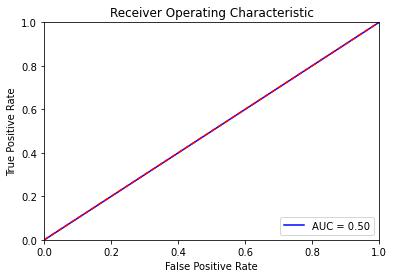

In [10]:


# calculate the fpr and tpr for all thresholds of the classification
y_true = test_dataset['istumor'] # ground truth labels
y_pred = test_dataset['istumor_Pred']# predicted probabilities generated by sklearn classifier
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()